In [1]:
import pathview
import json
from pathsim.blocks import Scope
import matplotlib.pyplot as plt
import pandas as pd

# read graph data from a JSON file
with open("ARC_with_parallel_GLC.json", "r") as f:
    graph_data = json.load(f)

model, duration = pathview.make_pathsim_model(graph_data)

model.run(1 * 24 * 3600)


21:16:05 - INFO - LOGGING (log: True)
21:16:05 - INFO - BLOCKS (total: 44, dynamic: 10, static: 34, eventful: 1)
21:16:05 - INFO - GRAPH (nodes: 44, edges: 75, alg. depth: 7, loop depth: 0, runtime: 0.140ms)
21:16:05 - INFO - STARTING -> TRANSIENT (Duration: 86400.00s)
21:16:06 - INFO - --------------------   1% | 1.1s<01:00 | 6.7 it/s
21:16:07 - INFO - --------------------   2% | 2.2s<01:54 | 5.4 it/s
21:16:08 - INFO - --------------------   3% | 3.3s<01:29 | 5.4 it/s
21:16:09 - INFO - #-------------------   5% | 4.4s<59.5s | 5.6 it/s
21:16:10 - INFO - #-------------------   6% | 5.6s<01:36 | 5.3 it/s
21:16:12 - INFO - #-------------------   7% | 7.1s<02:06 | 5.2 it/s
21:16:14 - INFO - #-------------------   8% | 8.9s<01:59 | 4.6 it/s
21:16:15 - INFO - #-------------------   9% | 10.2s<01:53 | 4.8 it/s
21:16:17 - INFO - ##------------------  10% | 11.9s<02:16 | 4.6 it/s
21:16:18 - INFO - ##------------------  11% | 13.6s<02:17 | 4.9 it/s
21:16:20 - INFO - ##------------------  12% | 1

{'total_steps': 736, 'successful_steps': 563, 'runtime_ms': 159916.11561600075}

Available scopes:
0: 45
1: 46
2: 16
3: 49
4: 30
5: 15
OFCScope labels: ['blanket (inv)', 'HX (inv)', 'FW (inv)', 'Divertor (inv)', 'T seperation membrane (inv)']
IFCScope labels: ['storage (inv)', 'pump (inv)', 'fuel cleanup (inv)', 'ISS (inv)']


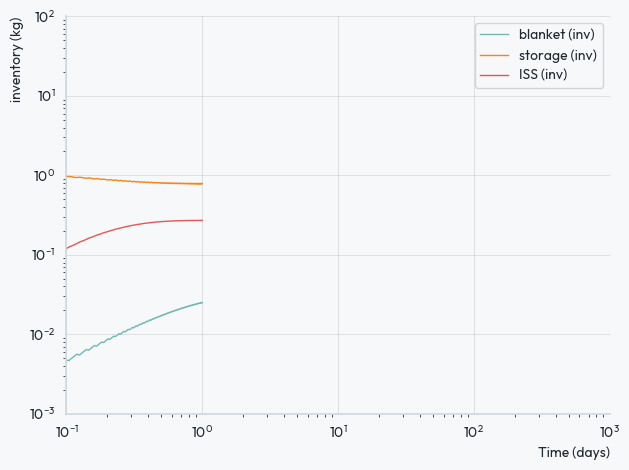

<Figure size 640x480 with 0 Axes>

In [2]:
import morethemes as mt
mt.set_theme("lighter")

scopes = [block for block in model.blocks if isinstance(block, Scope)]

print("Available scopes:")
for i, scope in enumerate(scopes):
    print(f"{i}: {scope.id}")

ifc_scope = scopes[2]
ofc_scope = scopes[5]
fusion_rate_scope = scopes[4]

print("OFCScope labels:", ofc_scope.labels)
print("IFCScope labels:", ifc_scope.labels)

for scope in [ofc_scope, ifc_scope]:
    sim_time, data = scope.read()
    for p, d in enumerate(data):
        lb = scope.labels[p] if p < len(scope.labels) else f"port {p}"
        if any([kw in lb.lower() for kw in ["blanket", "tes", "iss", "storage"]]):
            l, = plt.plot(sim_time / 3600 / 24, d, label=lb, linewidth=1)

            if "storage" in lb.lower():
                storage_colour = l.get_color()
            elif "blanket" in lb.lower():
                blanket_colour = l.get_color()

    plt.xlabel("Time (days)")
    plt.ylabel("inventory (kg)")
    plt.yscale("log")
    plt.xscale("log")
plt.ylim(1e-3, 1e2)
plt.xlim(1e-1, 1e3)

plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("arc_with_single_GLC.pdf")
